In [ ]:
# ========================= Step 1: Import Libraries and Load Dataset =========================

import pandas as pd
import numpy as np

df = pd.read_csv('./data/Titanic-Dataset.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# ========================= Step 2: Check for Duplicate Rows =========================
df.duplicated() # Returns a boolean Series indicating duplicate rows.

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Length: 891, dtype: bool

In [ ]:
print(df)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [ ]:
# ========================= Step 3: Identify Column Data Types =========================
# Generally used for text or categorical data.
cat_col = [col for col in df.columns if df[col].dtype == 'object']
num_col = [col for col in df.columns if df[col].dtype != 'object']

print('Categorical columns: ', cat_col)
print('Numerical columns: ', num_col)

Categorical columns:  ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
Numerical columns:  ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


In [ ]:
# ========================= Step 4: Count Unique Values in the Categorical Columns =========================
df[cat_col].nunique() # Returns count of unique values per column.

Name        891
Sex           2
Ticket      681
Cabin       147
Embarked      3
dtype: int64

In [ ]:
# ========================= Step 5: Calculate Missing Values as Percentage =========================
round((df.isnull().sum() / df.shape[0]) * 100, 2) # Detects missing values, returning boolean DataFrame.

PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64

In [ ]:
# ========================= Step 6: Drop Irrelevant or Data-Heavy Missing Columns =========================
df1 = df.drop(columns=['Name', 'Ticket', 'Cabin']) # Drops specified columns from the DataFrame.
df1.dropna(subset=['Embarked'], inplace=True) # Removes rows where specified columns have missing values.
df1['Age'].fillna(df1['Age'].mean(), inplace=True) # Fills missing values with specified value (e.g., mean).

/var/folders/8s/5p551ggs4fb2kjgvk5kzysnr0000gn/T/ipykernel_12416/2764641472.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['Age'].fillna(df1['Age'].mean(), inplace=True) # Fills missing values with specified value (e.g., mean).


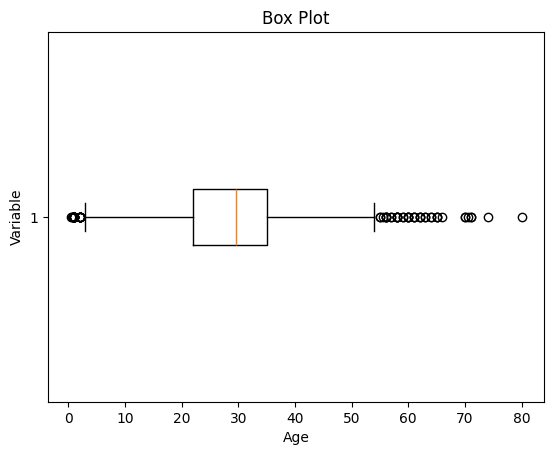

In [ ]:
# ========================= Step 7: Detect Outliers with Box Plot =========================
import matplotlib.pyplot as plt

plt.boxplot(df1['Age'], vert=False) # Displays distribution of data, highlighting median, quartiles and outliers.
plt.ylabel('Variable')
plt.xlabel('Age')
plt.title('Box Plot')
plt.show()

In [ ]:
# ========================= Step 8: Calculate Outlier Boundaries and Remove Them =========================
mean = df1['Age'].mean() # Mean
std = df1['Age'].std() # Standard Deviation (Do lech chuan)

# Define bounds as mean ± 2 * std for outlier detection.
lower_bound = mean - 2 * std
upper_bound = mean + 2 * std

print('Lower Bound: ', lower_bound)
print('Upper Bound: ', upper_bound)

df2 = df1[(df1['Age'] >= lower_bound) & (df1['Age'] <= upper_bound)]

print(df2)

Lower Bound:  3.7054001079256587
Upper Bound:  55.57878528533277
     PassengerId  Survived  Pclass     Sex        Age  SibSp  Parch     Fare  \
0              1         0       3    male  22.000000      1      0   7.2500   
1              2         1       1  female  38.000000      1      0  71.2833   
2              3         1       3  female  26.000000      0      0   7.9250   
3              4         1       1  female  35.000000      1      0  53.1000   
4              5         0       3    male  35.000000      0      0   8.0500   
..           ...       ...     ...     ...        ...    ...    ...      ...   
886          887         0       2    male  27.000000      0      0  13.0000   
887          888         1       1  female  19.000000      0      0  30.0000   
888          889         0       3  female  29.642093      1      2  23.4500   
889          890         1       1    male  26.000000      0      0  30.0000   
890          891         0       3    male  32.000000  

In [ ]:
# ========================= Step 9: Impute Missing Data Again if Any =========================
df3 = df2.fillna(df2['Age'].mean())
df3.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [ ]:
# ========================= Step 10: Recalculate Outlier Bounds and Remove Outliers from the Updated Data =========================
mean = df3['Age'].mean() # Calculates the average (mean) value of the Age column in the DataFrame df3
std = df3['Age'].std() # Computes the standard deviation (spread or variability) of the Age column in df3

lower_bound = mean - 2 * std # Defines the lower limit for acceptable Age values, set as two standard deviations below the mean
upper_bound = mean + 2 * std # Defines the upper limit for acceptable Age values, set as two standard deviations above the mean

print('Lower Bound: ', lower_bound)
print('Upper Bound: ', upper_bound)

df4 = df3[(df3['Age'] >= lower_bound) & (df3['Age'] <= upper_bound)] # Creates a new DataFrame df4 by selecting only rows where the Age value falls between the lower and upper bounds, effectively removing outlier ages outside this range

Lower Bound:  8.978989004171453
Upper Bound:  49.30395961288914


In [ ]:
# ========================= Step 11: Data validation and verification =========================

# Here we will consider only 'Sex' 'Age' 'SibSp', 'Parch' 'Fare' 'Embarked' 
# only as the independent features and Survived as target variables because 
# PassengerId will not affect the survival rate

X = df3[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
Y = df3['Survived']

In [ ]:
# ========================= Step 12: Data formatting =========================

# =============== 1. Min-Max Scaling ===============

from sklearn.preprocessing import MinMaxScaler
# Min-Max scaling rescales the values to a specified range, typically between 0 and 
# 1. It preserves the original distribution and ensures
# that the minimum value maps to 0 and the maximum value maps to 1.
scaler = MinMaxScaler(feature_range=(0, 1))

num_col_ = [col for col in X.columns if X[col].dtype != 'object']
x1 = X
x1[num_col_] = scaler.fit_transform(x1[num_col_])
x1.head()

# =============== 2. Standardization (Z-score scaling) ===============

# Z = (X - μ) / σ

# Where:
# X = Data
# μ = Mean value of X
# σ = Standard deviation of X

/var/folders/8s/5p551ggs4fb2kjgvk5kzysnr0000gn/T/ipykernel_12416/1761829158.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x1[num_col_] = scaler.fit_transform(x1[num_col_])


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1.0,male,0.349515,0.125,0.0,0.014151,S
1,0.0,female,0.660194,0.125,0.0,0.139136,C
2,1.0,female,0.427184,0.000,0.0,0.015469,S
3,0.0,female,0.601942,0.125,0.0,0.103644,S
4,1.0,male,0.601942,0.000,0.0,0.015713,S
